In [1]:
"""
 corners : 
           
 create   : 2019/10/16
 modified : 2019/10/19
"""

'\n corners : \n           \n create   : 2019/10/16\n modified : 2019/10/19\n'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
# RGB2GRAY
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [4]:
# convolution 2D
def conv2d(img, kernel, padding='same'):
    # Error handling
    if kernel.shape[0] != kernel.shape[1]:
        print("Use square filter!")
        return None
    
    if kernel.shape[0]%2 == 0 and kernel.shape[1]%2 == 0:
        print("filter size has to be odd")
        return None
    
    # Create result matrix
    result = np.zeros_like(img)
    
    # Calculate kernel size
    kernel_size = kernel.shape[0]
    
    # same padding
    if padding=='same':
        pad_size = int((kernel_size - 1) / 2)
    else:
        pad_size = 0
    img = np.pad(img, pad_size, mode='constant')
    
    # convolution
    width, height = img.shape
    offset = int(kernel_size / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            result[x-offset, y-offset] = np.sum(img[x-offset:x+offset+1, y-offset:y+offset+1] * kernel)
            
    return result

In [7]:
# coding: utf-8

# In[1]:

get_ipython().magic(u'pylab inline')


# In[3]:

import scipy as sp
import time
 

class Heat_Equation(object):
    """
    Class which implements a numerical solution of the 2d heat equation
    """
    def __init__(self, dx, dy, a, kind, timesteps = 1):
                 self.dx = dx # Interval size in x-direction.
                 self.dy = dy # Interval size in y-direction.
                 self.a = a # Diffusion constant.
                 self.timesteps = timesteps  #Number of time-steps to evolve system.
                 self.dx2 = dx**2
                 self.dy2 = dy**2
                 self.nx = int(1/dx)
                 self.ny = int(1/dy)
                # For stability, this is the largest interval possible
                # for the size of the time-step:
                 self.dt = self.dx2*self.dy2/( 2*a*(self.dx2+self.dy2) )
                 self.u,self.ui = self.get_initial_conditions(kind)
                    
    def get_initial_conditions(self, kind):
        # Start u and ui off as zero matrices:
        ui = sp.zeros([self.nx,self.ny])
        u = sp.zeros([self.nx,self.ny])
        # Now, set the initial conditions (ui).
        for i in range(self.nx):
            for j in range(self.ny):
                if kind == "two_circles":
                    p = (i*self.dx - 0.5)**2 + (j*self.dy - 0.5)**2
                    if ( p  <= .03 and p >= 0.020 ):
                        ui[i,j] = 1
                    elif ( p  <= .108 and p >= 0.09 ):
                        ui[i,j] = 1
                elif kind == "part_circle":
                    p = (i*self.dx - 0.5)**2 + (j*self.dy - 0.5)**2
                    if ( p  <= .01 and p >= 0.009):
                        ui[i,j] = 1
                elif kind == "four_blobs":
                    p = (i*self.dx - .4)**2 + (j*self.dy - .4)**2
                    if ( p  <= 0.02 and p >= 0.02):
                        ui[i,j] = 1
                elif kind == "two_blobs":
                    p = (i*self.dx - .4)**2 + (j*self.dy - .4)**2
                    if ( p  <= 0.05 and p >= .05):
                        ui[i,j] = 1
                elif kind == "half_moon":
                    p = (i*self.dx-.2)**2+(j*self.dy-.2)**2
                    if ( p <= 0.1 and p >=.05 ):
                        ui[i,j] = 1
                elif kind == "2_lines":
                    p = (i*self.dx-.5)**2+(j*self.dy-j*.4)**2
                    if ( p <= 0.1 and p >=.05 ):
                        ui[i,j] = 1
                elif kind == "circle":
                    p = (i*self.dx-0.5)**2+(j*self.dy-0.5)**2
                    if ( p <= 0.1 and p >=.05 ):
                        ui[i,j] = 1
                elif kind == "lower_blob":
                    p = (i*self.dx-0.)**2+(j*self.dy-0.)**2 
                    if ( p <= 0.1 and p >=.05 ):
                        ui[i,j] = 1
                elif kind  == "two_half_moons":
                    p = (i*self.dx - 0.5)**3 + (j*self.dy - 0.5)**3
                    if ( p  <= .03 and p >= 0.020 ):
                        ui[i,j] = 1
                    elif ( p  <= .108 and p >= 0.09 ):
                        ui[i,j] = 1
        return u,ui
    
    def evolve_ts(self):
        self.u[1:-1, 1:-1] = self.ui[1:-1, 1:-1] + self.a*self.dt*( (self.ui[2:, 1:-1] - 2*self.ui[1:-1, 1:-1] + self.ui[:-2, 1:-1])/self.dx2 + (self.ui[1:-1, 2:] - 2*self.ui[1:-1, 1:-1] + self.ui[1:-1, :-2])/self.dy2 )
        self.ui = self.u.copy()
        
def evolve_ts(u, ui):
    global nx, ny
    """
    This function uses two plain Python loops to
    evaluate the derivatives in the Laplacian, and
    calculates u[i,j] based on ui[i,j].
    """
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            uxx = ( ui[i+1,j] - 2*ui[i,j] + ui[i-1, j] )/ dx2
            uyy = ( ui[i,j+1] - 2*ui[i,j] + ui[i, j-1] )/ dy2
            u[i,j] = ui[i,j]+dt*a*(uxx+uyy)


# In[4]:

from tempfile import NamedTemporaryFile

def anim_to_mp4(anim,k):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            newname = "/tmp/" + k + f.name.split("/")[-1]
            print(newname)

            anim.save(newname, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])    
    return None

def save_animation(anim,k):
    plt.close(anim._fig)
    return anim_to_mp4(anim,k)


# In[5]:

from matplotlib import animation
#initial_shapes = ["two_circles", "part_circle", "four_blobs", "two_blobs", "half_moon", "two_half_moons", "2_lines", "circle", "lower_blob"]
initial_shapes = ["two_circles"]

for k in initial_shapes:
    test_heat = Heat_Equation(0.001,0.001,.5,k,1)    
    
    # First set up the figure, the axis, and the plot element we want to animate
    
    
    fig = plt.figure()
    img = plt.subplot(111)
    
    im = img.imshow(test_heat.ui, cmap=get_cmap("hot"), interpolation='nearest', origin='lower')
    im.figure = fig
    fig.colorbar(im)
                
    def animate(i,im):
        if i % 50 == 0:
            print(i)
        test_heat.evolve_ts()
        im.set_array(test_heat.ui)

        return [im]
        
        
    anim = animation.FuncAnimation(fig, animate, frames=2000, fargs=(im,),  interval=30, blit=True)
    save_animation(anim,k)

Populating the interactive namespace from numpy and matplotlib


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
/tmp/two_circlestmp3q_dgsei.mp4
0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950


ValueError: unknown file extension: .mp4

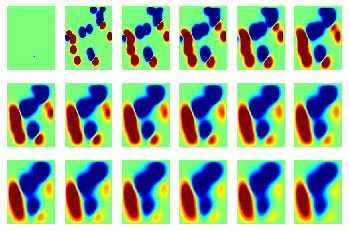

In [10]:
dt=0.002;
Dz=1;
dx=1;
dy=1;
#Those parameters fix the number of points in the grid. For isntance, the total x length of the plate will be dx*nx
nx=120;
ny=120;
nt=50000;
#We precharge the p matrix which will have inside the numerical solutions.
p=np.zeros([nx,ny,nt]);
#Here we set the boundary conditions for t (can be call initial conditions). It is going to be 20 hot or cold points in random positions.
for f in range(20):
    p[round((nx-1)*rand()),round((ny-1)*rand()),0]=sign(rand()-0.51);
for m in range(1,nt):
    #A simple implementation (but not quite eficient) will be iterating each point at a time. Because we have a matrix, we can operate with whole sections of the matrix at each time.
    #Basically, we take time slices and operate them as a whole. To use centered differences, we simply shift the matrix one element in the x direction or in the y direction.
    p[1:nx-1,1:ny-1,m]=p[1:nx-1,1:ny-1,m-1]+dt*Dz*((p[2:nx,1:ny-1,m-1]-2*p[1:nx-1,1:ny-1,m-1]+p[0:nx-2,1:ny-1,m-1])/np.power(dx,2)+(p[1:nx-1,2:ny,m-1]-2*p[1:nx-1,1:ny-1,m-1]+p[1:nx-1,0:ny-2,m-1])/np.power(dy,2));

#Finally we plot several iterations
fig = figure()
for g in range(18):
    subplot(3,6,g+1)
    axis([0,nx,0,ny])
    pcolor(p[:,:,round(g*(nt-1)/17)],vmin=-0.001,vmax=0.001,cmap='jet')
    axis('off')